<a href="https://colab.research.google.com/github/AidanFeldman/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability

Two things to consider when solving numeric integration is the **accuracy** and **stability** of a scheme. The accuracy refers to the distance from the numerical solution from the actual solution as step size increases. The stability refers to whether or not error increases with time.

<ipython-input-7-37f226c6aa2d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


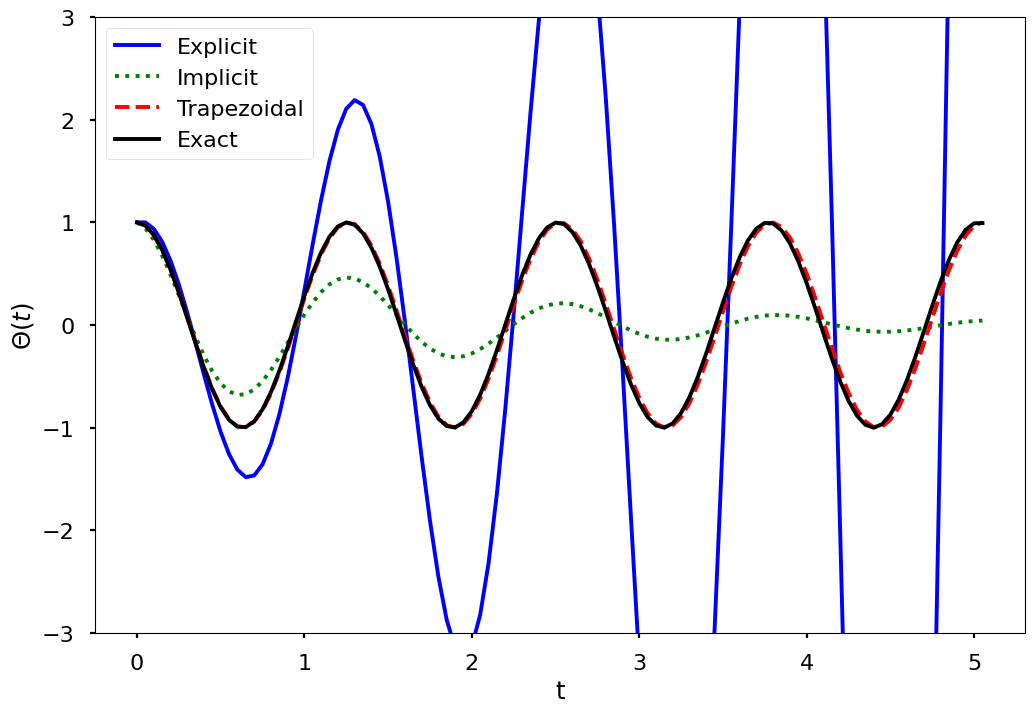

In [7]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

h = 0.05
t = np.arange(0, 5.1, h)
w = 5
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 Predictor-Corrector and Runge Kutta Methods

**Predictor-corrector methods** use a predictor step and a corrector step to increase the accuracy of a method of solution. First using a previously discussed method of estimating the numerical solution of an ODE and then using the given ODE to use the approximation to improve the accuracy of the guess.

The **Runge Kutta methods** use the Taylor series truncated at a higher order derivative to increase the accuracy of the numerical solution as compared to Euler's method.



# 22.6 Python ODE Solvers

Python has built in methods for solving ODEs.

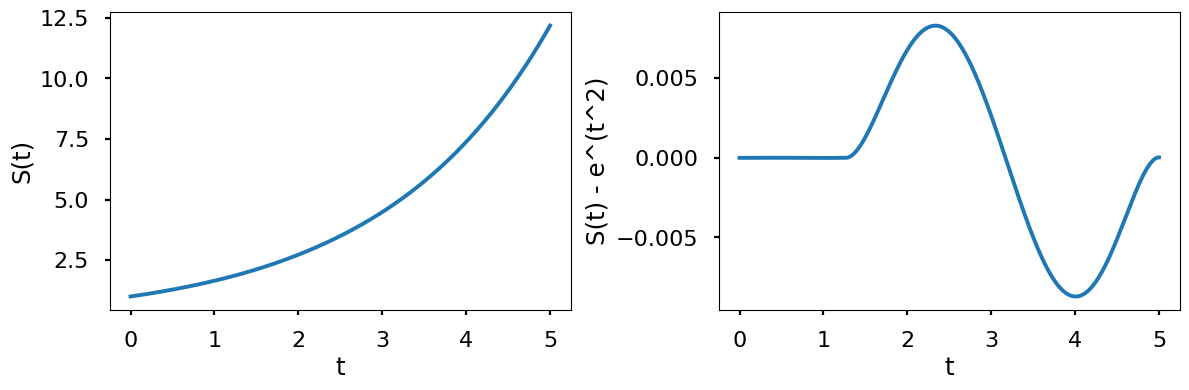

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.exp(t/2)/2

t_eval = np.arange(0, 5, 0.001)
sol = solve_ivp(F, [0, 5], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp((sol.t)/2))
plt.xlabel('t')
plt.ylabel('S(t) - e^(t^2)')
plt.tight_layout()
plt.show()